In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#hidden layer weights
dat1 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/20x20/W1.csv')
dat2 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/20x20/W2.csv')
dat3 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/20x20/W3.csv')
dat4 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/20x20/W4.csv')

#hidden layer weights for 32x32 spins
w200_L2=  pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/L2_reg/W_200.csv')



#hidden layer weights for 200 hidden neuron  with L2 reg
w200_L2=  pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/L2_reg/W_200.csv')

#hidden layer weights for 50 hidden neurons with L2 reg
w50_L2=  pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/L2_reg/W_50.csv')

#hidden layer weights for 10 hidden neurons with L2 reg
w10_L2=  pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/L2_reg/W_10.csv')

#hidden layer weigths for 3 hidden neurons with L1 reg
w3_L2 =pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/L2_reg/W_3.csv')


#output layer weigths
out4 = pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/20x20/O4.csv')


In [8]:
#cuts the first column which is useless numbering
w1 = np.asarray(dat1.drop(dat1.keys()[0], axis = 1))
w2 = np.asarray(dat2.drop(dat2.keys()[0], axis = 1))
w3 = np.asarray(dat3.drop(dat3.keys()[0], axis = 1))
w4 = np.asarray(dat4.drop(dat1.keys()[0], axis = 1))

o4= np.asarray(out4.drop(out4.keys()[0], axis = 1))

w200_L2 = np.asarray(w200_L2.drop(w200_L2.keys()[0], axis = 1))
w50_L2=  np.asarray(w50_L2.drop(w50_L2.keys()[0], axis = 1))
w10_L2= np.asarray(w10_L2.drop(w10_L2.keys()[0], axis = 1))
w3_L2 = np.asarray(w3_L2.drop(w3_L2.keys()[0], axis = 1))
print(np.shape(w1))

(400, 200)


In [21]:
#plots the weith matrices for each hudden
def plots_w(w):
    #spin number for the sides of the square
    n_s=int(np.sqrt(len(w[:,0])))
    hidden= len(w[0,:])
    fig, ax = plt.subplots(4,4,figsize=(10,10))
    im=ax[0,0].imshow(w[:,0].reshape(-1,n_s))
    ax[0,1].imshow(w[:,1].reshape(-1,n_s))
    ax[0,2].imshow(w[:,2].reshape(-1,n_s))
    ax[0,3].imshow(w[:,3].reshape(-1,n_s))

    ax[1,0].imshow(w[:,4].reshape(-1,n_s))
    ax[1,1].imshow(w[:,5].reshape(-1,n_s))
    ax[1,2].imshow(w[:,7].reshape(-1,n_s))
    ax[1,3].imshow(w[:,8].reshape(-1,n_s))

    ax[2,0].imshow(w[:,9].reshape(-1,n_s))
    ax[2,1].imshow(w[:,10].reshape(-1,n_s))
    ax[2,2].imshow(w[:,11].reshape(-1,n_s))
    ax[2,3].imshow(w[:,12].reshape(-1,n_s))

    ax[3,0].imshow(w[:,13].reshape(-1,n_s))
    ax[3,1].imshow(w[:,14].reshape(-1,n_s))
    ax[3,2].imshow(w[:,15].reshape(-1,n_s))
    ax[3,3].imshow(w[:,hidden-10].reshape(-1,n_s))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    

#a , b, c correspond to the hidden neuron indeex
def fourier_t(w,a,b,c):
    n_s=int(np.sqrt(len(w[:,0])))
    
    f1 = np.fft.fft2(w[:,a].reshape(-1,n_s))
    f1shift = np.fft.fftshift(f1) 
    
    f2 = np.fft.fft2(w[:,b].reshape(-1,n_s))
    f2shift = np.fft.fftshift(f2)
    
    f3 = np.fft.fft2(w[:,c].reshape(-1,n_s))
    f3shift = np.fft.fftshift(f3) 
    
    #log ff to see the differences better
    magnitude_spectrum1 = np.log(np.abs(f1shift))
    magnitude_spectrum2 = np.log(np.abs(f2shift))
    magnitude_spectrum3 = np.log(np.abs(f3shift))
    
    fig, ax = plt.subplots(1,3,figsize=(10,10))
    ax[0].imshow(magnitude_spectrum1, cmap = 'gray')
    ax[1].imshow(magnitude_spectrum2, cmap = 'gray')
    ax[2].imshow(magnitude_spectrum3, cmap = 'gray')
    
    #finds the mean image of the log ff
    f_values=[]    
    for i in range(0,len(w[0,:])):
        f = np.fft.fft2(w[:,i].reshape(-1,n_s))
        log_f=np.log(np.abs(f))
        f_values.append(np.mean(log_f))
        
    return f_values

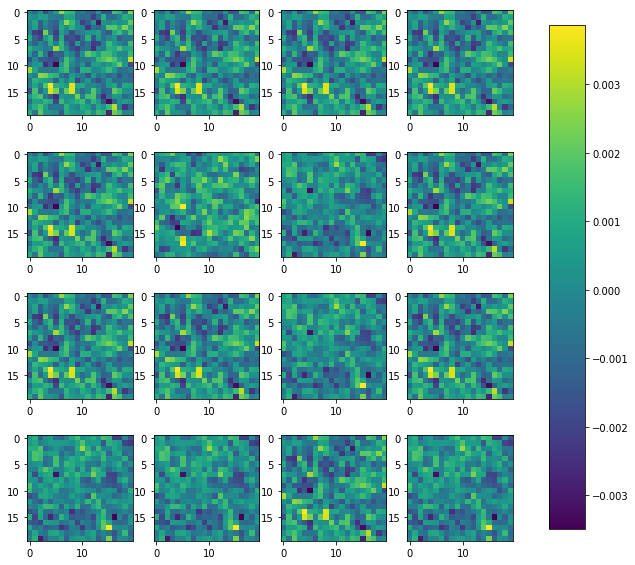

In [6]:
plots_w(w1)

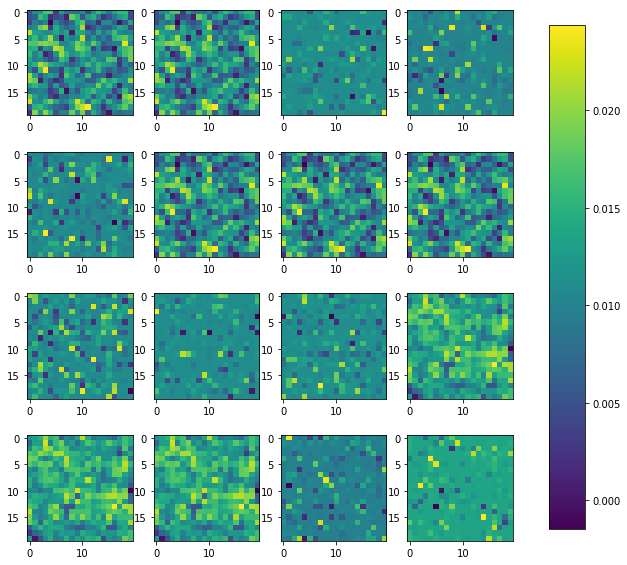

In [7]:
plots_w(w2)

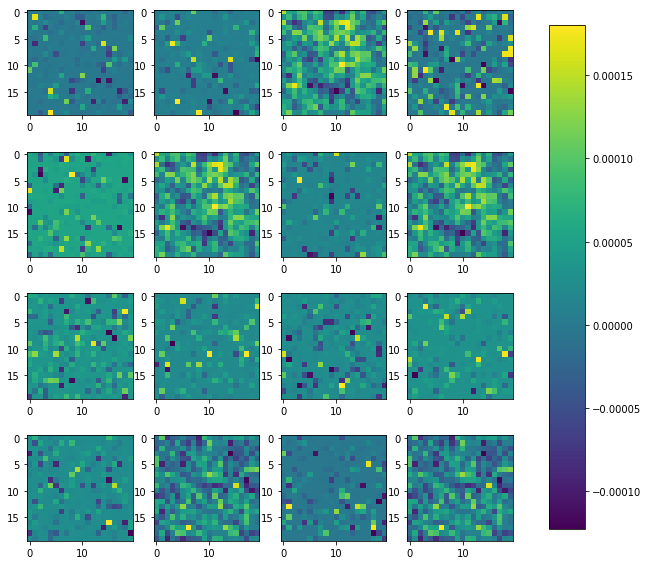

In [8]:
plots_w(w3)

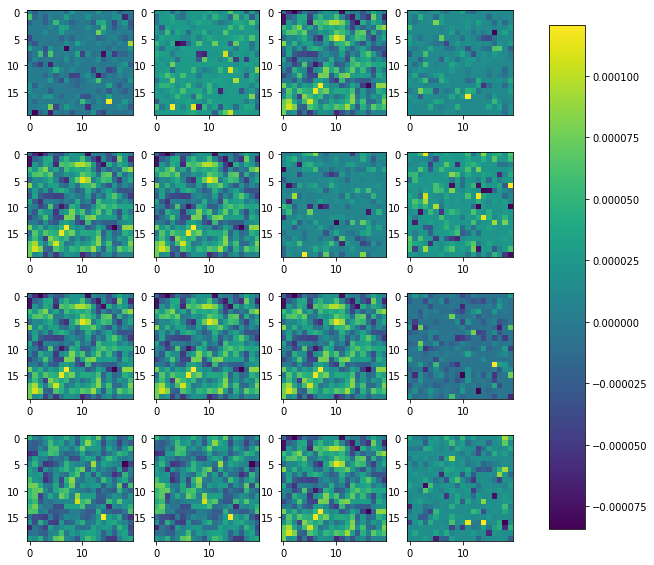

In [20]:
plots_w(w4)

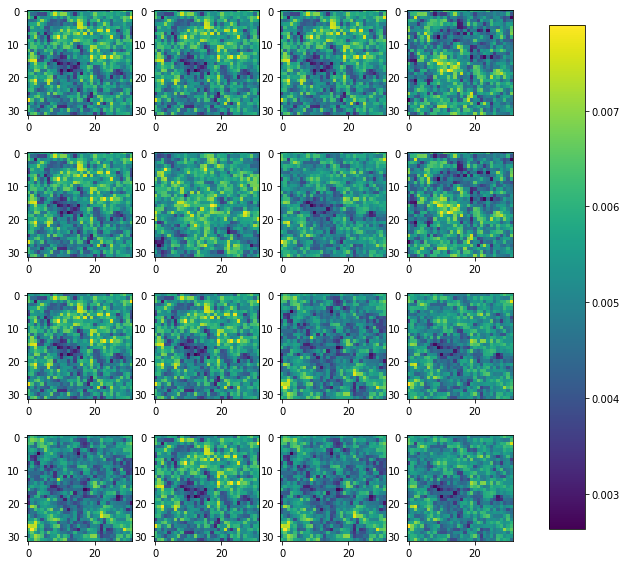

In [10]:
plots_w(w200_L2)

(1024, 50)


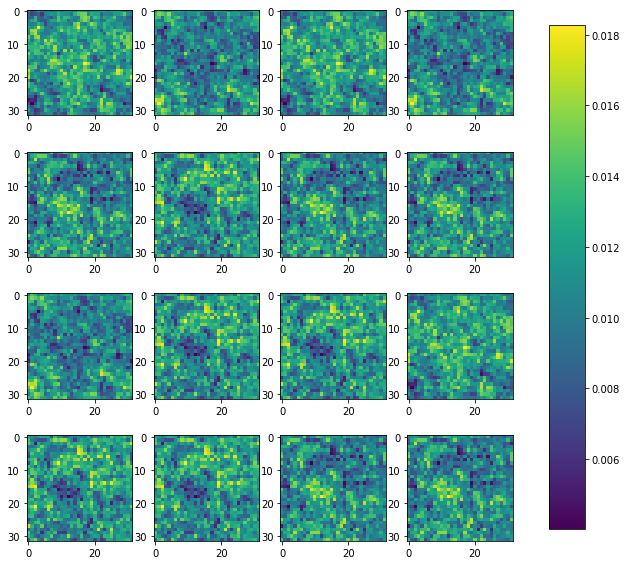

In [11]:
plots_w(w50_L2)
print(np.shape(w50_L2))

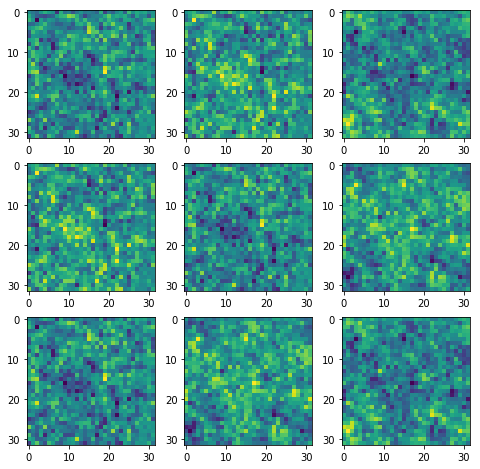

In [12]:
    #spin number for the sides of the square
n_s=int(np.sqrt(len(w10_L2[:,0])))
hidden= len(w10_L2[0,:])

fig, ax = plt.subplots(3,3,figsize=(8,8))
im=ax[0,0].imshow(w10_L2[:,0].reshape(-1,n_s))
ax[0,1].imshow(w10_L2[:,1].reshape(-1,n_s))
ax[0,2].imshow(w10_L2[:,2].reshape(-1,n_s))
ax[1,0].imshow(w10_L2[:,3].reshape(-1,n_s))
ax[1,1].imshow(w10_L2[:,4].reshape(-1,n_s))
ax[1,2].imshow(w10_L2[:,5].reshape(-1,n_s))
ax[2,0].imshow(w10_L2[:,6].reshape(-1,n_s))
ax[2,1].imshow(w10_L2[:,7].reshape(-1,n_s))
ax[2,2].imshow(w10_L2[:,8].reshape(-1,n_s))


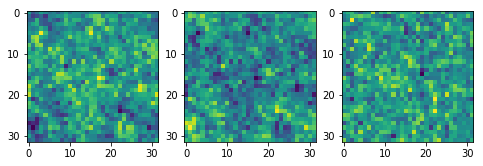

In [141]:
w3_L2
    #spin number for the sides of the square
n_s=int(np.sqrt(len(w3_L2[:,0])))
hidden= len(w3_L2[0,:])

fig, ax = plt.subplots(1,3,figsize=(8,8))
im=ax[0].imshow(w3_L2[:,0].reshape(-1,n_s))
ax[1].imshow(w3_L2[:,1].reshape(-1,n_s))
ax[2].imshow(w3_L2[:,2].reshape(-1,n_s))


In [142]:
#accuracy for the squared error, cross entropy and cross entropy with 100 hidden neurons
#acc_sqr = pd.read_csv('acc_squared_error.csv')
#acc_cross_200=pd.read_csv('acc_cross_entropy.csv')
#acc_cross_100=pd.read_csv('acc_cross_entropy_100.csv')



In [ ]:
#acc_sqr = np.asarray(acc_sqr.drop(acc_sqr.keys()[0], axis = 1))
#acc_cross_200 = np.asarray(acc_cross_200.drop(acc_cross_200.keys()[0], axis = 1))
#acc_cross_100 = np.asarray(acc_cross_100.drop(acc_cross_100.keys()[0], axis = 1))



In [143]:
#plt.plot(acc_sqr[:150],label='Squared error')
#plt.plot(acc_cross_200[:150] , label = 'Cross entropy 100')
#plt.plot(acc_cross_100[:150], label = 'Cross entropy 200', color='red')
#plt.legend()

Text(0.5,1,'Fourier T. for a 3 hidden neuron neural network')

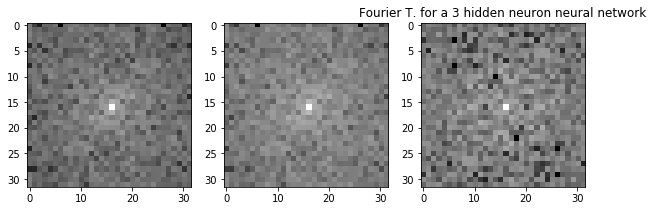

In [25]:
fourier_t(w3_L2,0,1,2)
plt.title('Fourier T. for a 3 hidden neuron neural network')

Text(0.5,1,'Fourier T. for a 200 hidden neuron neural network')

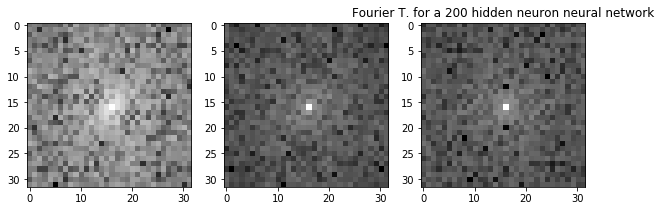

In [22]:
f_val= fourier_t(w200_L2,0,3,10)
plt.title('Fourier T. for a 200 hidden neuron neural network')


200


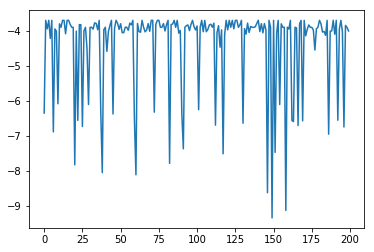

In [26]:
plt.plot(f_val)